In [5]:
#Codigo de Python para pronosticos con Holt-Winters
#Importando librerias

In [6]:
#dataframe operations-pandas
import pandas as pd
#plotting data - matplotlib
from matplotlib import pyplot as plt
#time series-statsmodels
#Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose

#holt winters
#single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
#double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [7]:
#Descomposicion de la serie temporal

(144, 1)
            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


<AxesSubplot:title={'center':'Passengers Data'}, xlabel='Month'>

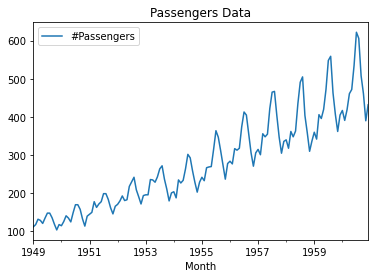

In [9]:
airline=pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
#finding shape of the dataframe
print(airline.shape)
#having a look at the data
print(airline.head())
#plotting the original data
airline[['#Passengers']].plot(title='Passengers Data')

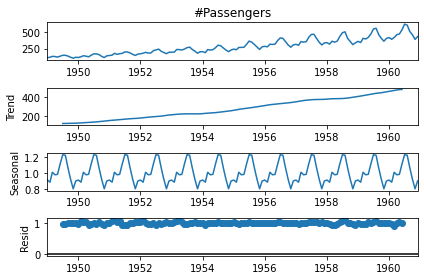

In [15]:
decompose_result=seasonal_decompose(airline['#Passengers'],model='multiplicative')
decompose_result.plot();

In [16]:
#Ajuste de los datos con el suavizado exponencial de Holt-Winters

In [17]:
#Set the frequency of the date time index as Monthly
#Start as indicated by the data
airline.index.freq='MS'
#Set the value of Alpha and define m (Time period)
m=12
alpha=1/(2*m)

In [18]:
#Single HWES

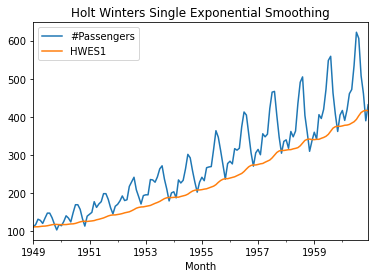

In [20]:
airline['HWES1']=SimpleExpSmoothing(
    airline['#Passengers']).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
airline[['#Passengers','HWES1']].plot(
    title='Holt Winters Single Exponential Smoothing');

In [23]:
# Double HWES

In [24]:
airline['HWES2_ADD']=ExponentialSmoothing(airline['#Passengers'],
                                          trend='add').fit().fittedvalues

In [27]:
airline['HWES2_MUL']=ExponentialSmoothing(airline['#Passengers'],
                                          trend='mul').fit().fittedvalues

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing: Additive and Multiplicative'}, xlabel='Month'>

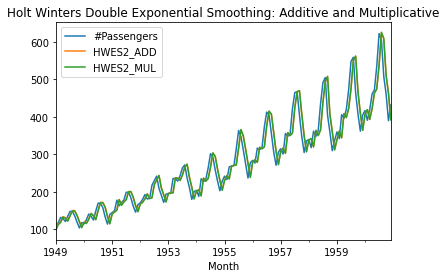

In [30]:
airline[['#Passengers','HWES2_ADD','HWES2_MUL']].plot(
title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative')

In [33]:
# Triple HWES

C:\Users\eduma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\eduma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:title={'center':'Holt Winters Triple Exponential Smoothing: Additive and Multiplicative'}, xlabel='Month'>

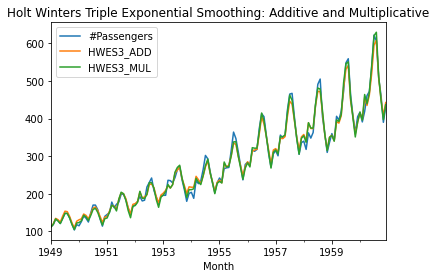

In [34]:
airline['HWES3_ADD']=ExponentialSmoothing(airline['#Passengers'],
                                          trend='add',seasonal='add',
                                          seasonal_periods=12).fit().fittedvalues
airline['HWES3_MUL']=ExponentialSmoothing(airline['#Passengers'],
                                          trend='mul',seasonal='mul',
                                          seasonal_periods=12).fit().fittedvalues
airline[['#Passengers','HWES3_ADD','HWES3_MUL']].plot(
    title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative')

In [36]:
#Forecasting with Holt-Winters Exponential Smoothing (Triple ES)

In [39]:
forecast_data = pd.read_csv('AirPassengers.csv',
                            index_col='Month',parse_dates=True)
forecast_data.index.freq = 'MS'
# Split into train and test set
train_airline = forecast_data[:120]
test_airline = forecast_data[120:]

C:\Users\eduma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\eduma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\eduma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

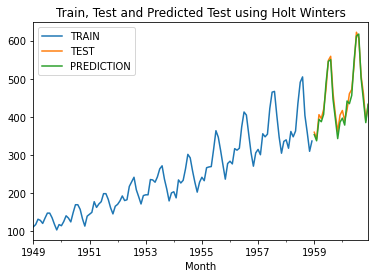

In [40]:
fitted_model = ExponentialSmoothing(train_airline['#Passengers'],
                                    trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

In [41]:
# A medida que nos acercamos al segmento pronosticado,
# parece que el modelo ha hecho un trabajo aceptable en general.

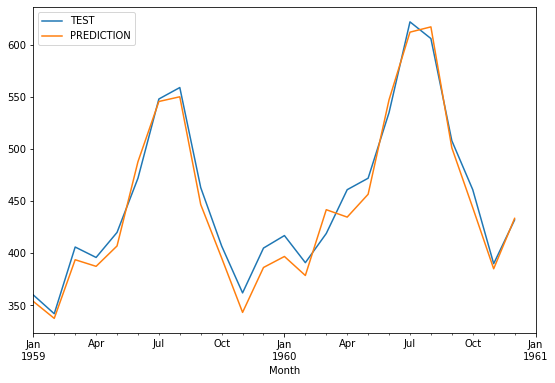

In [42]:
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(9,6))
test_predictions.plot(legend=True,label='PREDICTION',
                      xlim=['1959','1961']);

In [43]:
# Evaluación de métricas

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test_airline,test_predictions)}')
print(f'Mean Squared Error = {mean_squared_error(test_airline,test_predictions)}')

Mean Absolute Error = 12.379391964591376
Mean Squared Error = 192.57742277726808
